# Passenger analysis

In [2]:
import pandas as pd
from warnings import filterwarnings

In [3]:
dataframe = pd.read_csv('/Users/senthilkumarr/Documents/jupyter_notebooks/Kovai/Daily_Public_Transport_Passenger_Boardings_By_Passenger_Group_20240619.csv')

In [4]:
dataframe.head()

Date  Other  Adult  Concession  Tertiary  School student
0  01-07-2019   2302  31702       12117      9238           15181
1  02-07-2019   2660  33561       12829      9416           15479
2  03-07-2019   2695  33032       13151      9241           15378
3  04-07-2019   2545  33139       13068      9375           14882
4  05-07-2019   2460  31142       12909      9199           13297

In [5]:
dataframe.shape

(1814, 6)

In [6]:
from matplotlib import pyplot as plt

# From the below info, we could see, 
## a datetime column - to be changed into datetime format
## no missing values in other 5 columns

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1814 non-null   object
 1   Other           1814 non-null   int64 
 2   Adult           1814 non-null   int64 
 3   Concession      1814 non-null   int64 
 4   Tertiary        1814 non-null   int64 
 5   School student  1814 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 85.2+ KB


In [8]:
dataframe.describe()

Other         Adult    Concession      Tertiary  School student
count  1814.000000   1814.000000   1814.000000   1814.000000     1814.000000
mean   3196.755788  18373.068357   7377.896913   6549.912348     9492.528115
std    2134.409967  10408.770948   3470.039248   3534.823312     7509.332139
min      83.000000     42.000000     59.000000      0.000000        0.000000
25%    1537.500000   7480.250000   4026.750000   3859.500000     2145.500000
50%    2695.000000  20139.500000   7959.500000   5913.500000     6233.000000
75%    4359.500000  27608.000000   9924.000000   8536.250000    16798.500000
max    9893.000000  39665.000000  16807.000000  15480.000000    24290.000000

In [9]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%d-%m-%Y')

In [10]:
dataframe.set_index('Date', drop=True, inplace= True)

In [11]:
dataframe

Other  Adult  Concession  Tertiary  School student
Date                                                          
2019-07-01   2302  31702       12117      9238           15181
2019-07-02   2660  33561       12829      9416           15479
2019-07-03   2695  33032       13151      9241           15378
2019-07-04   2545  33139       13068      9375           14882
2019-07-05   2460  31142       12909      9199           13297
...           ...    ...         ...       ...             ...
2024-06-13   8783  28590       10176     10761           17252
2024-06-14   8593  25949       10306     10309           16656
2024-06-15   2491   9833        4550      6329            2443
2024-06-16   2075   6720        3234      5147            1791
2024-06-17   8320    201         254         0               0

[1814 rows x 5 columns]

## checking the pattern of the recent data 

<Figure size 600x400 with 0 Axes>

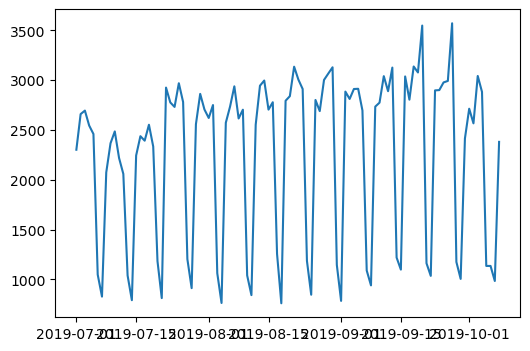

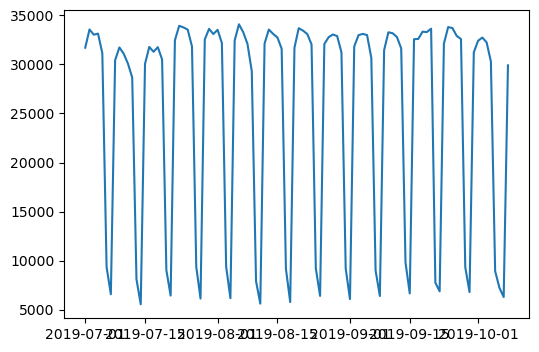

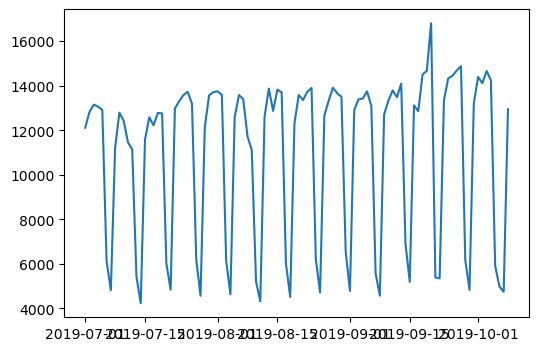

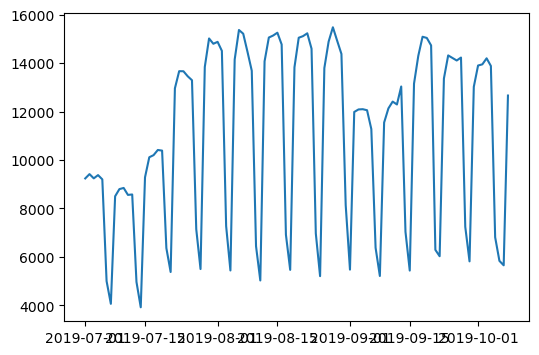

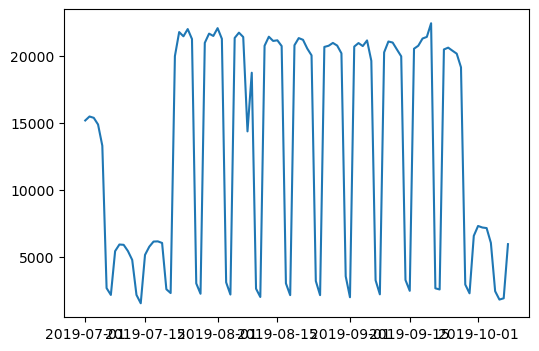

In [12]:
plt.figure(figsize=(6,4))
for cols in dataframe.columns:
    plt.figure(figsize=(6,4))
    plt.plot(dataframe[cols][:100])


## checking if the series are stationary using ADF method

In [73]:
from statsmodels.tsa.stattools import adfuller
for cols in dataframe.columns:
    result = adfuller(dataframe[cols])
    print(f'Test Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'critical_values: {result[4]}')
    if result[1] > 0.05:
        print(cols + " column is not stationary \n")
    else:
        print(cols + " column is stationary \n")

Test Statistics: 0.209505172406181
p-value: 0.9727896993809968
critical_values: {'1%': -3.433972018026501, '5%': -2.8631399192826676, '10%': -2.5676217442756872}
Date column is not stationary 

Test Statistics: -3.5692490000650356
p-value: 0.006376877876029548
critical_values: {'1%': -3.4340044039750235, '5%': -2.863154216066867, '10%': -2.5676293568762953}
Other column is stationary 

Test Statistics: -3.8322494766125557
p-value: 0.0025940691874495937
critical_values: {'1%': -3.4340044039750235, '5%': -2.863154216066867, '10%': -2.5676293568762953}
Adult column is stationary 

Test Statistics: -3.721778985700248
p-value: 0.003817035763694
critical_values: {'1%': -3.434006447337251, '5%': -2.863155118104396, '10%': -2.567629837184558}
Concession column is stationary 

Test Statistics: -3.110956554859011
p-value: 0.025752908312417118
critical_values: {'1%': -3.4340044039750235, '5%': -2.863154216066867, '10%': -2.5676293568762953}
Tertiary column is stationary 

Test Statistics: -6.2571

/Users/senthilkumarr/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


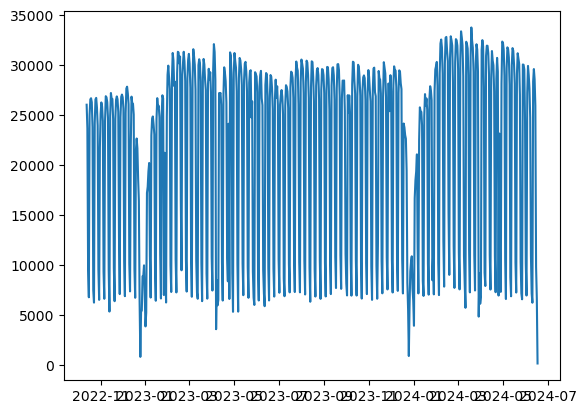

In [14]:
plt.plot(dataframe['Adult'][1200:])

## Checkpoints - 
### -- series are stationary
### -- there is a decent correlation within them but not too much to rely on, so lets try how it fits 

In [74]:
from statsmodels.tsa import ar_model

## check trend changes and their duration 

Detected change points: [265, 330, 470, 540, 580, 775, 850, 905, 945, 1115, 1180, 1195, 1265, 1310, 1375, 1395, 1460, 1475, 1545, 1560, 1595, 1610, 1630, 1675, 1705, 1745, 1765, 1814]


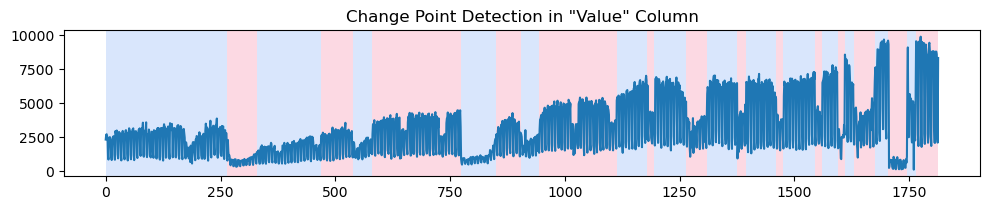

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt


signal = dataframe['Other'].values

# Apply the PELT algorithm
algo = rpt.Pelt(model='rbf').fit(signal)
change_points = algo.predict(pen=3)

print("Detected change points:", change_points)

# Plot the results
rpt.display(signal, change_points)
plt.title('Change Point Detection in "Value" Column')
plt.show()


## With a bit of domain knowledge, we could conclude
### -- data collected during pre and post covid
### -- data has events influencing them in various time periods
### -- the forecast we need, does not have much relation to large history in the series

In [81]:
from datetime import datetime

In [91]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt


# Separate DataFrame for VAR model from original dataframe
data = {
    'Date': dataframe.index,
    'Adult': dataframe['Adult'],
    'Concession': dataframe['Concession'],
    'Other': dataframe['Other'],
    'School student': dataframe['School student'],
    'Tertiary': dataframe['Tertiary']
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Train-Test Split
forecast_steps = 7
train, test = df[:-forecast_steps], df[-forecast_steps:]

# Fit the VAR model
model = VAR(train)
model_fitted = model.fit()

# Forecasting
lag_order = model_fitted.k_ar
forecast_input = train.values[-lag_order:]
forecast = model_fitted.forecast(y=forecast_input, steps=len(test))

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=df.columns)

# Compute MAE and MAPE
mae = mean_absolute_error(test.values, forecast_df.values)
mape = mean_absolute_percentage_error(test.values, forecast_df.values)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Mean Absolute Error (MAE): 6747.269094378967
Mean Absolute Percentage Error (MAPE): 2.2035307100099817e+18


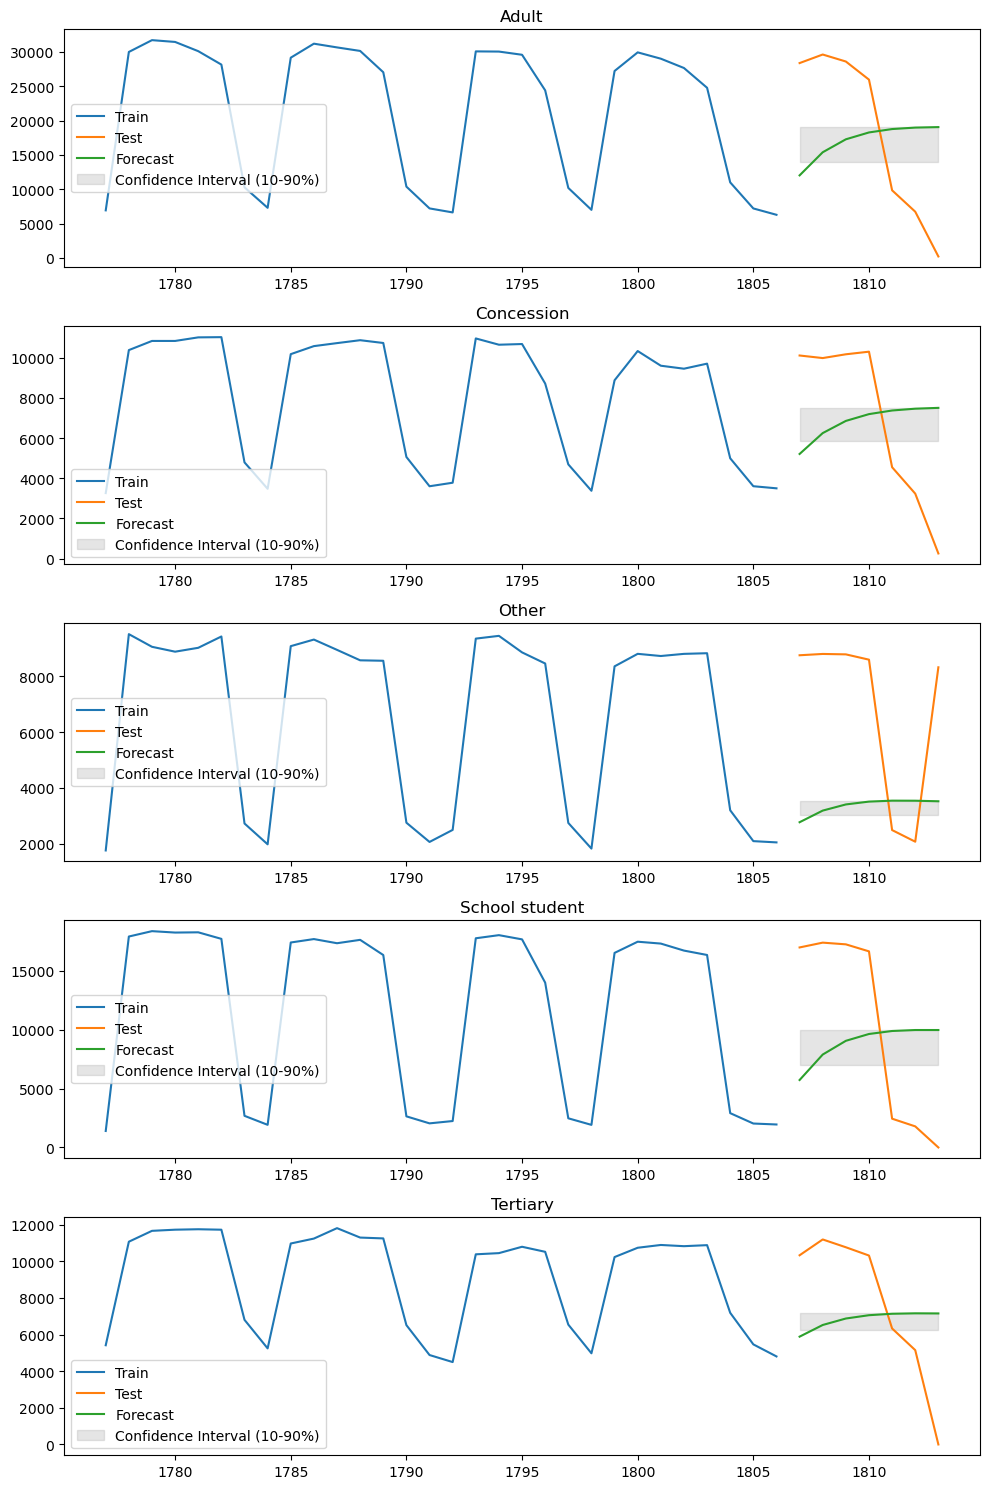

In [92]:
# Plot the forecasts with confidence intervals
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 15))
for i, column in enumerate(df.columns):
    axes[i].plot(train.index[-30:], train[column][-30:], label='Train')
    axes[i].plot(test.index, test[column], label='Test')
    axes[i].plot(forecast_df.index, forecast_df[column], label='Forecast')
    
    # Calculate confidence intervals (mean and quantiles)
    mean_forecast = forecast_df[column]
    lower_quantile = forecast_df[column].quantile(0.1)
    upper_quantile = forecast_df[column].quantile(0.9)
    
    axes[i].fill_between(forecast_df.index, lower_quantile, upper_quantile, color='gray', alpha=0.2, label='Confidence Interval (10-90%)')
    
    axes[i].set_title(column)
    axes[i].legend()

plt.tight_layout()
plt.show()


## VAR looks poor, but gave a benchmark to breach, lets try Prophet

In [98]:
dataframe.corr()

Date     Other     Adult  Concession  Tertiary  \
Date            1.000000  0.514213  0.103659   -0.069031  0.204270   
Other           0.514213  1.000000  0.700078    0.588322  0.630274   
Adult           0.103659  0.700078  1.000000    0.960434  0.864456   
Concession     -0.069031  0.588322  0.960434    1.000000  0.859945   
Tertiary        0.204270  0.630274  0.864456    0.859945  1.000000   
School student  0.004389  0.641273  0.835502    0.812207  0.732287   

                School student  
Date                  0.004389  
Other                 0.641273  
Adult                 0.835502  
Concession            0.812207  
Tertiary              0.732287  
School student        1.000000

# correlation also proves, the interdependency is not great
# only school student might need an adult to accompany him/her
# adult might have concession / senior citizen might have 

# Prophet and its improvisations

In [114]:
dataframe

index       Date  Other  Adult  Concession  Tertiary  School student
0         0 2019-07-01   2302  31702       12117      9238           15181
1         1 2019-07-02   2660  33561       12829      9416           15479
2         2 2019-07-03   2695  33032       13151      9241           15378
3         3 2019-07-04   2545  33139       13068      9375           14882
4         4 2019-07-05   2460  31142       12909      9199           13297
...     ...        ...    ...    ...         ...       ...             ...
1809   1809 2024-06-13   8783  28590       10176     10761           17252
1810   1810 2024-06-14   8593  25949       10306     10309           16656
1811   1811 2024-06-15   2491   9833        4550      6329            2443
1812   1812 2024-06-16   2075   6720        3234      5147            1791
1813   1813 2024-06-17   8320    201         254         0               0

[1814 rows x 7 columns]

In [115]:
dataframe.shape

(1814, 7)

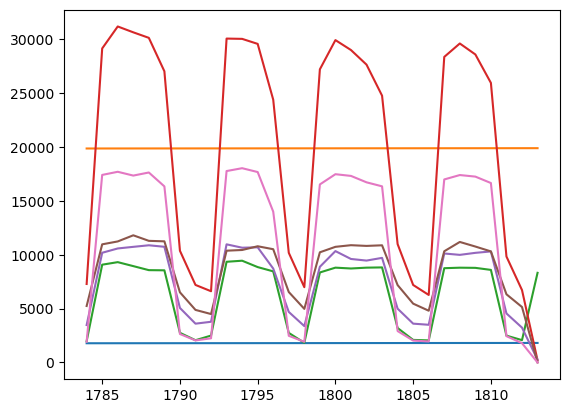

In [116]:
plt.plot(dataframe.tail(30))

## Fourier Transfort, could not find unobvious seasons,
## so lets leave it to Prophet to handle it. 

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


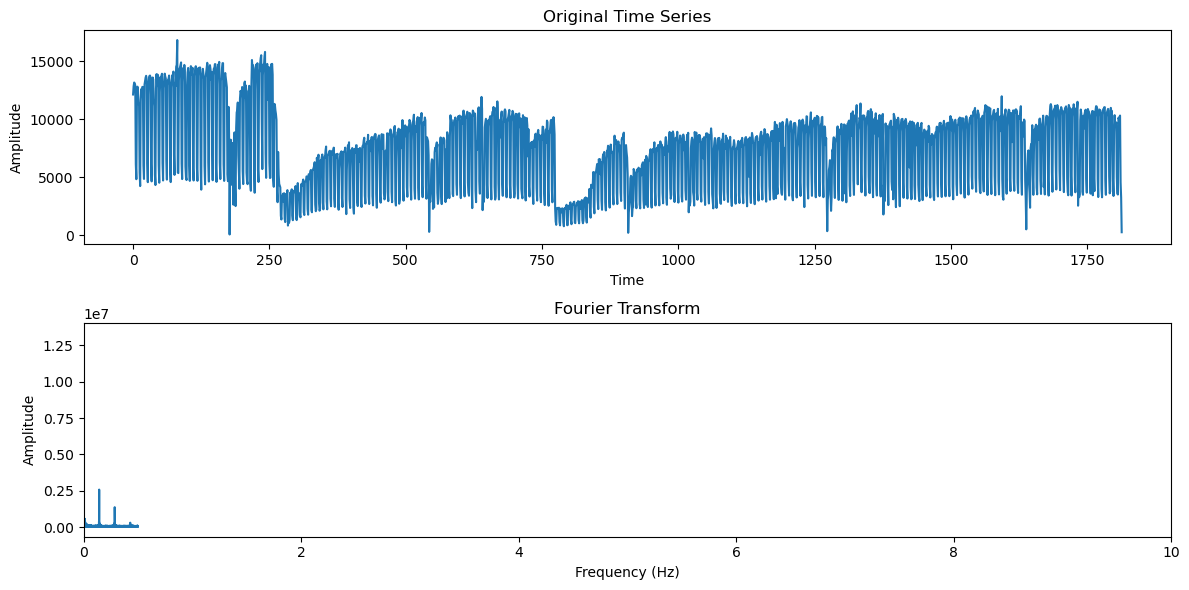

In [117]:
t = np.array(dataframe.index)
y = np.array(dataframe['Concession'])

print(type(t), type(y))

# Example time series data
# t = np.linspace(0, 10, 1000)
# y = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 5 * t)

print(type(t), type(y))

# Perform Fourier transform
fft_result = np.fft.fft(y)
freq = np.fft.fftfreq(len(t), t[1] - t[0])

# Plotting the original and frequency domain signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_result))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 10)  # Limiting to frequencies of interest
plt.tight_layout()
plt.show()

### having clear df for prophet 

In [124]:
import pandas as pd
import numpy as np

In [174]:
passenger_count_df = pd.read_csv('/Users/senthilkumarr/Documents/jupyter_notebooks/Kovai/Daily_Public_Transport_Passenger_Boardings_By_Passenger_Group_20240619.csv')


In [175]:
passenger = passenger_count_df.copy()

In [176]:
passenger_count_df.head()

Date  Other  Adult  Concession  Tertiary  School student
0  01-07-2019   2302  31702       12117      9238           15181
1  02-07-2019   2660  33561       12829      9416           15479
2  03-07-2019   2695  33032       13151      9241           15378
3  04-07-2019   2545  33139       13068      9375           14882
4  05-07-2019   2460  31142       12909      9199           13297

In [207]:
passenger.head()

Date  Other  Adult  Concession  Tertiary  School student
0  01-07-2019   2302  31702       12117      9238           15181
1  02-07-2019   2660  33561       12829      9416           15479
2  03-07-2019   2695  33032       13151      9241           15378
3  04-07-2019   2545  33139       13068      9375           14882
4  05-07-2019   2460  31142       12909      9199           13297

In [178]:
passenger_count_df['ds'] = pd.to_datetime(passenger_count_df['Date'], format="%d-%m-%Y")

passenger_count_df.rename({'Other':'y'}, axis=1, inplace = True)

passenger_count_df.drop('Date', axis=1, inplace=True)

passenger_count_df.head()

In [182]:
from prophet import Prophet

In [183]:
passenger_count_df.shape

(1814, 6)

In [184]:
df_train = passenger_count_df[:1807]
df_test = passenger_count_df[1807:]

In [185]:
model = Prophet()

In [186]:
df_test.shape

(7, 6)

10:49:17 - cmdstanpy - INFO - Chain [1] start processing
10:49:17 - cmdstanpy - INFO - Chain [1] done processing


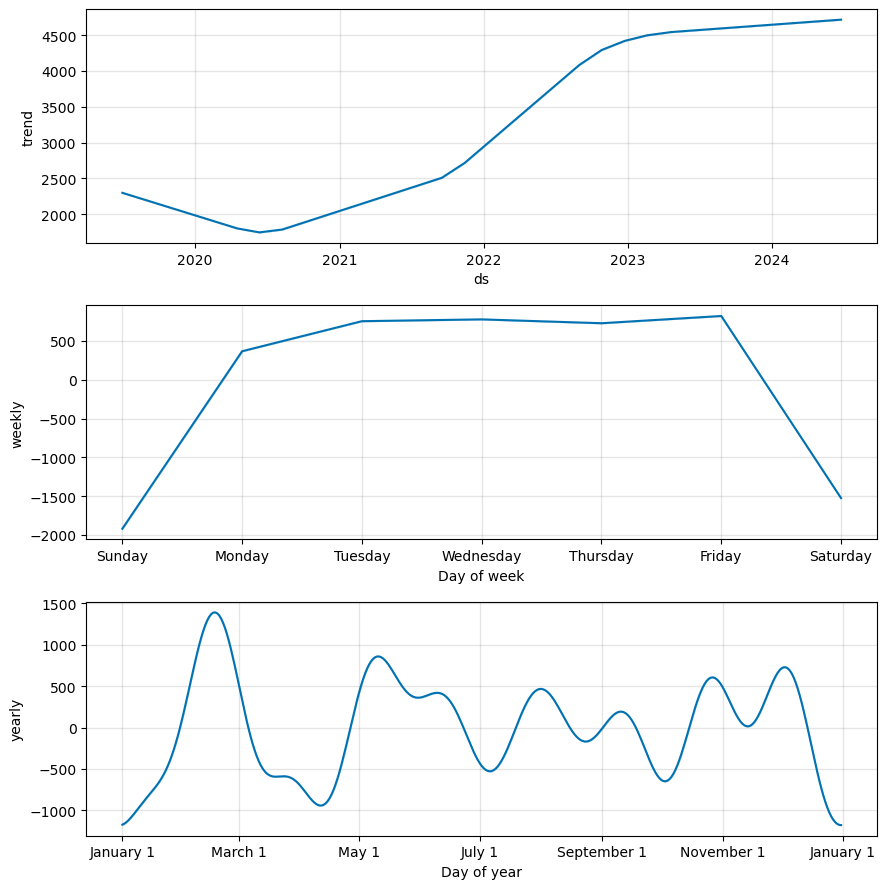

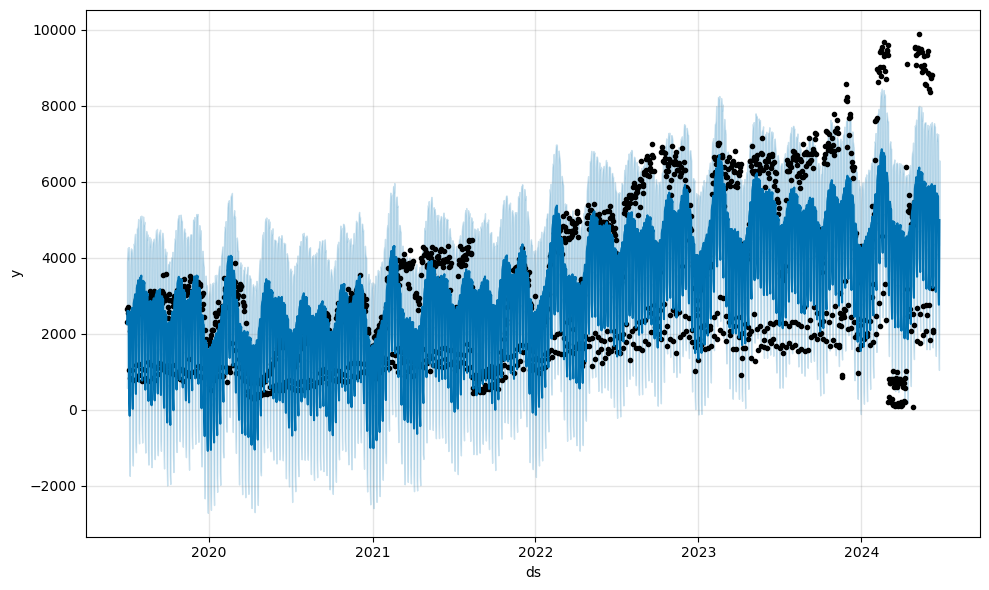

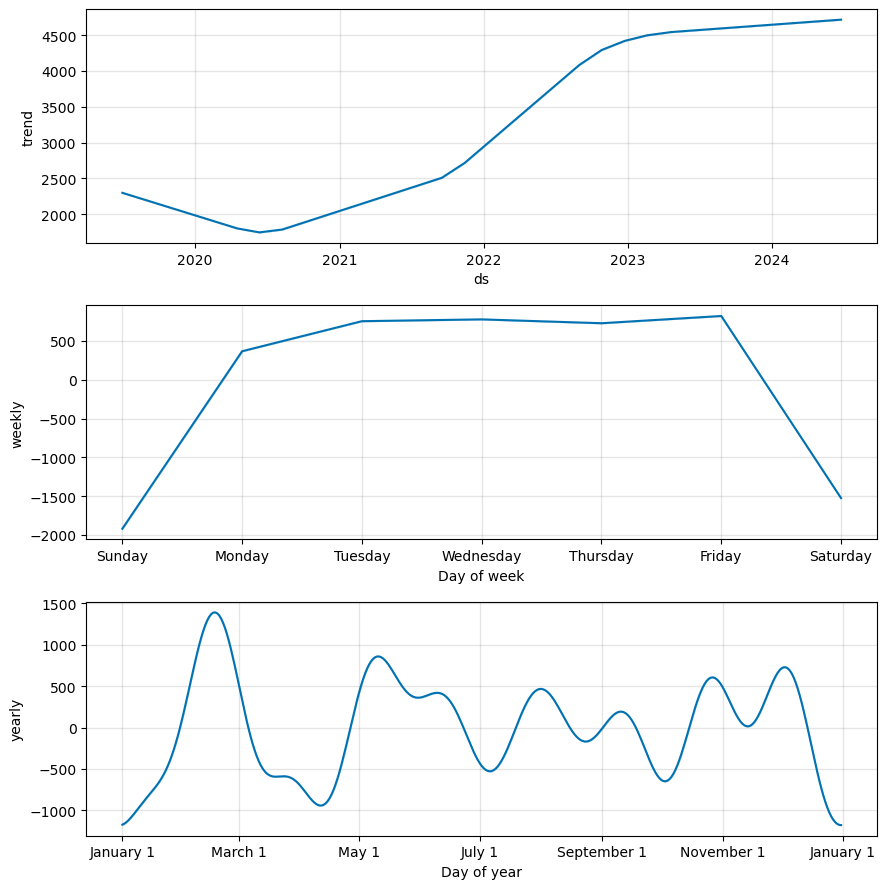

In [187]:
model.fit(df_train)

predict_df = model.make_future_dataframe(periods=14)

prediction = model.predict(predict_df)

model.plot(prediction)

model.plot_components(prediction)

In [188]:
prediction.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2019-07-01  2300.538006   573.790980  3897.276624  2300.538006  2300.538006   
1 2019-07-02  2298.827246   962.602638  4139.656457  2298.827246  2298.827246   
2 2019-07-03  2297.116485  1025.048909  4269.158515  2297.116485  2297.116485   
3 2019-07-04  2295.405725   899.562029  3961.923261  2295.405725  2295.405725   
4 2019-07-05  2293.694964  1094.574526  4281.322891  2293.694964  2293.694964   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0      -44.237310            -44.237310            -44.237310  366.453583   
1      306.266017            306.266017            306.266017  753.478128   
2      299.238667            299.238667            299.238667  776.742996   
3      226.137406            226.137406            226.137406  727.170917   
4      302.920741            302.920741            302.920741  820.301439   

   weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0    366.453583    366.453583 -410.690893   -410.690893   -410.690893   
1    753.478128    753.478128 -447.212111   -447.212111   -447.212111   
2    776.742996    776.742996 -477.504329   -477.504329   -477.504329   
3    727.170917    727.170917 -501.033511   -501.033511   -501.033511   
4    820.301439    820.301439 -517.380698   -517.380698   -517.380698   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  2256.300696  
1                         0.0  2605.093262  
2                         0.0  2596.355152  
3                         0.0  2521.543131  
4                         0.0  2596.615705

In [189]:
comparison_df = pd.merge(df_test,prediction[['ds', 'yhat_lower','yhat_upper','yhat']], on='ds' )


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mae)

mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mape)


MAE :  2352.5533919664913
MAE :  0.3681980448663733


## improved results can be seen for one series, lets try to improve

10:49:18 - cmdstanpy - INFO - Chain [1] start processing
10:49:18 - cmdstanpy - INFO - Chain [1] done processing


MAE :  2491.4495282517614
MAPE :  0.3612383151986667


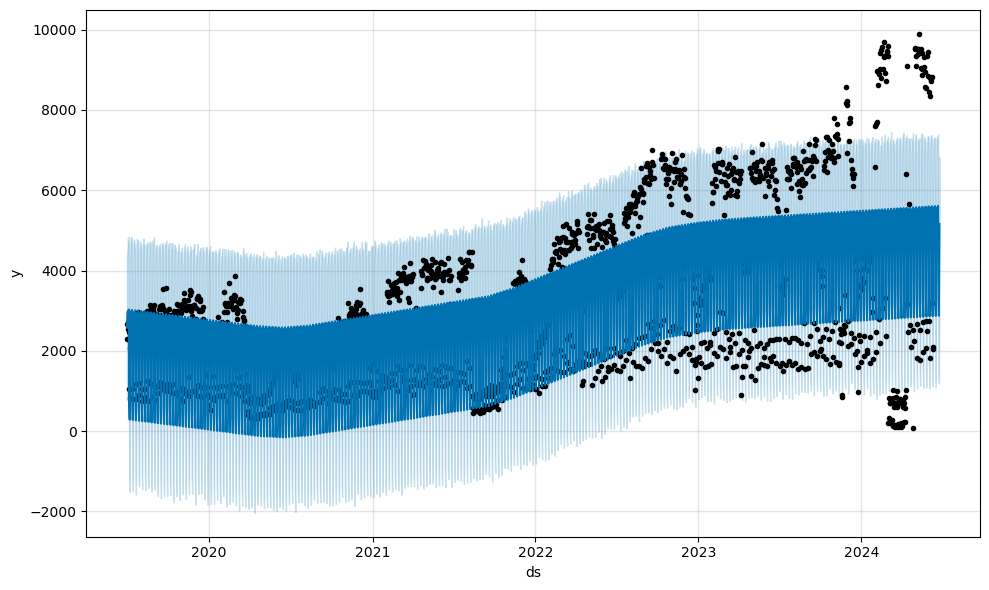

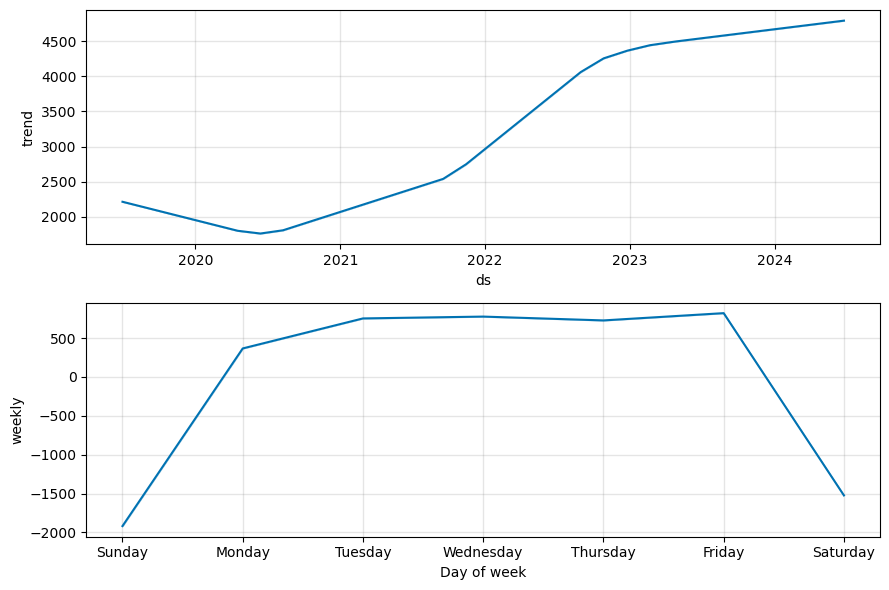

In [190]:
model = Prophet(yearly_seasonality=False)

model.fit(df_train)

predict_df = model.make_future_dataframe(periods=14)

prediction = model.predict(predict_df)

model.plot(prediction)

model.plot_components(prediction)

comparison_df = pd.merge(df_test,prediction[['ds', 'yhat_lower','yhat_upper','yhat']][-14:], on='ds' )


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mae)

mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])

print('MAPE : ', mape)


## yearly seasonality is playing a part, lets include holiday info for India(assumption)

/Users/senthilkumarr/anaconda3/lib/python3.11/site-packages/holidays/countries/india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
10:49:19 - cmdstanpy - INFO - Chain [1] start processing
10:49:19 - cmdstanpy - INFO - Chain [1] done processing


MAE :  2357.057060295359
MAPE :  0.3751976255127607


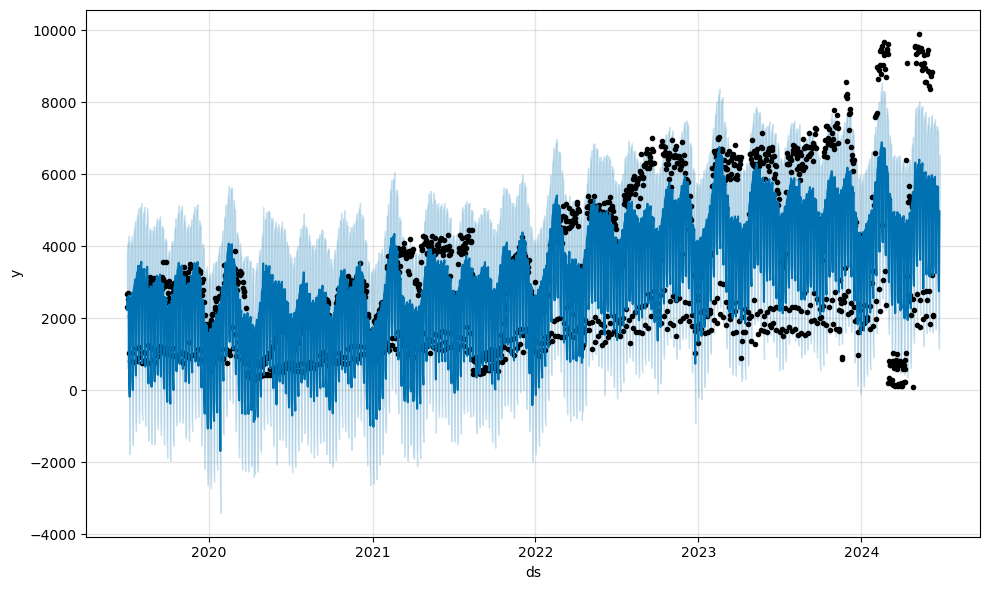

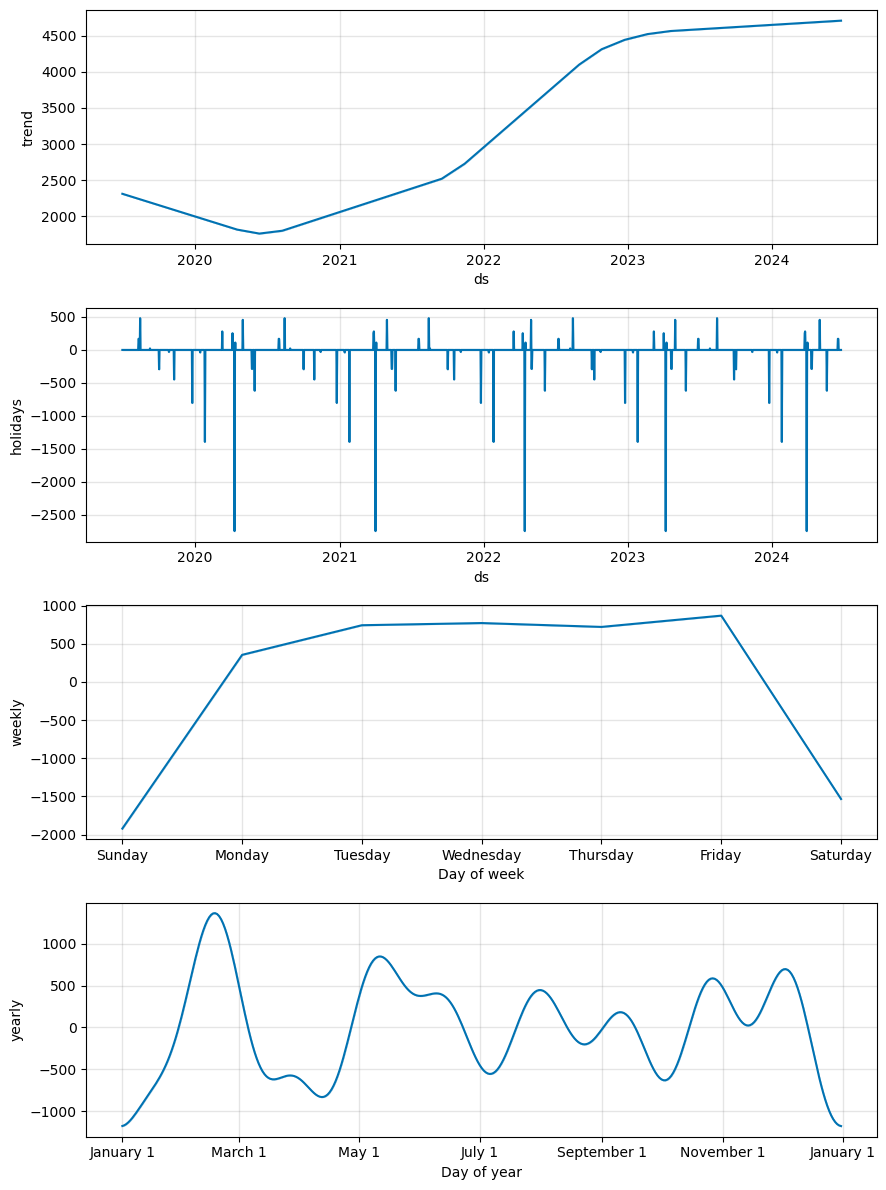

In [191]:
model = Prophet()

model.add_country_holidays(country_name='IN')

model.fit(df_train)

predict_df = model.make_future_dataframe(periods=14)

prediction = model.predict(predict_df)

model.plot(prediction)

model.plot_components(prediction)

comparison_df = pd.merge(df_test,prediction[['ds', 'yhat_lower','yhat_upper','yhat']][-14:], on='ds' )


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mae)

mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])

print('MAPE : ', mape)


## including covid info as events 

In [192]:
# covid event 
covid = pd.DataFrame({
    'holiday':'covid',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': - 10 ,
    'upper_window': 600
})



# covid recovery event 
covid_recovery = pd.DataFrame({
    'holiday':'covid_recovery',
    'ds': pd.to_datetime(['2021-10-15']),
    'lower_window': - 10 ,
    'upper_window': 220
})

In [193]:
events = pd.concat([covid, covid_recovery])

In [194]:
events

holiday         ds  lower_window  upper_window
0           covid 2020-03-15           -10           600
0  covid_recovery 2021-10-15           -10           220

10:49:21 - cmdstanpy - INFO - Chain [1] start processing
10:49:23 - cmdstanpy - INFO - Chain [1] done processing


MAE :  2069.3811459974518
MAPE :  0.295550378474875


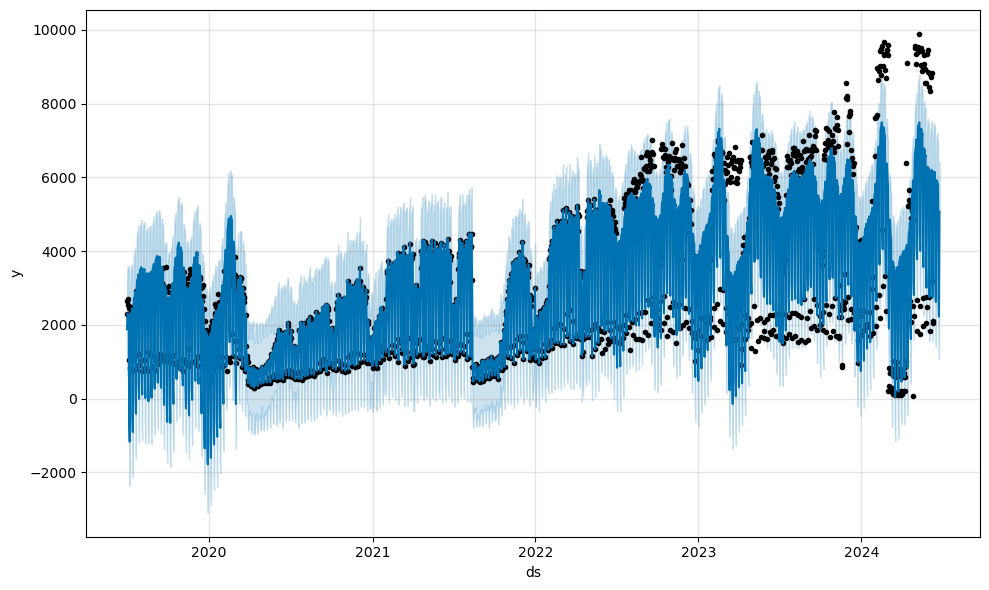

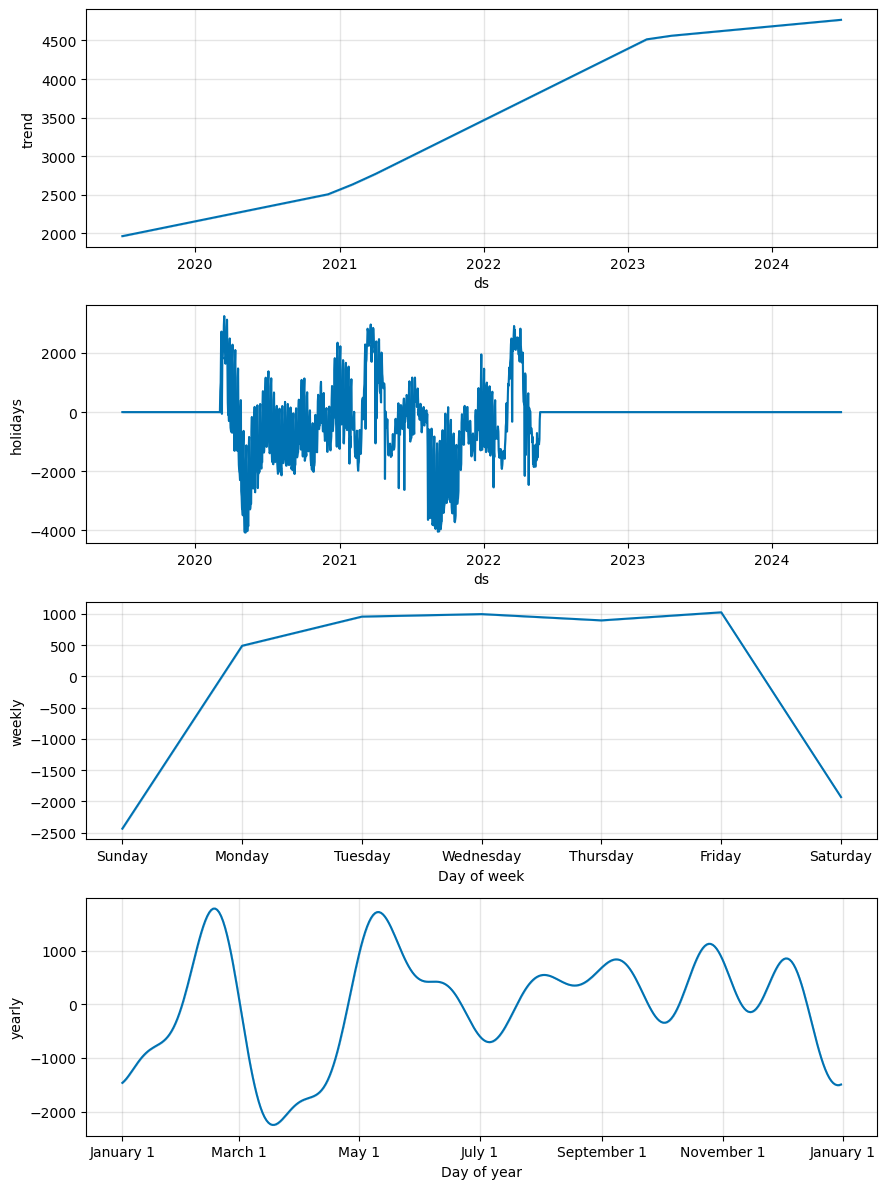

In [195]:
model = Prophet(holidays= events, seasonality_prior_scale=15)

# model.add_country_holidays(country_name='IN')

model.fit(df_train)

predict_df = model.make_future_dataframe(periods=14)

prediction = model.predict(predict_df)

model.plot(prediction)

model.plot_components(prediction)

comparison_df = pd.merge(df_test,prediction[['ds', 'yhat_lower','yhat_upper','yhat']], on='ds' )


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mae)

mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])

print('MAPE : ', mape)


## changepoints found usinf PEFT model earlier are being included, eventhough Prophet could find changepoints

In [196]:
change_points_index = [265, 330, 470, 540, 580, 775, 850, 905, 945, 1115, 1180, 1195, 1265, 1310, 1375, 1395, 1460, 1475, 1545, 1560, 1595, 1610, 1630, 1675, 1705, 1745, 1765]

manual_change_points = [df_train['ds'][0]+timedelta(i+1) for i in change_points_index]
print(manual_change_points)

# df_train[df_train['ds'].isin(manual_change_points)]

[Timestamp('2020-03-23 00:00:00'), Timestamp('2020-05-27 00:00:00'), Timestamp('2020-10-14 00:00:00'), Timestamp('2020-12-23 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-08-15 00:00:00'), Timestamp('2021-10-29 00:00:00'), Timestamp('2021-12-23 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-07-21 00:00:00'), Timestamp('2022-09-24 00:00:00'), Timestamp('2022-10-09 00:00:00'), Timestamp('2022-12-18 00:00:00'), Timestamp('2023-02-01 00:00:00'), Timestamp('2023-04-07 00:00:00'), Timestamp('2023-04-27 00:00:00'), Timestamp('2023-07-01 00:00:00'), Timestamp('2023-07-16 00:00:00'), Timestamp('2023-09-24 00:00:00'), Timestamp('2023-10-09 00:00:00'), Timestamp('2023-11-13 00:00:00'), Timestamp('2023-11-28 00:00:00'), Timestamp('2023-12-18 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-03-02 00:00:00'), Timestamp('2024-04-11 00:00:00'), Timestamp('2024-05-01 00:00:00')]


In [197]:
#  model.changepoints = pd.to_datetime(changepoints)

10:49:25 - cmdstanpy - INFO - Chain [1] start processing
10:49:26 - cmdstanpy - INFO - Chain [1] done processing


MAE :  2069.4164949869064
MAPE :  0.29477359233938966


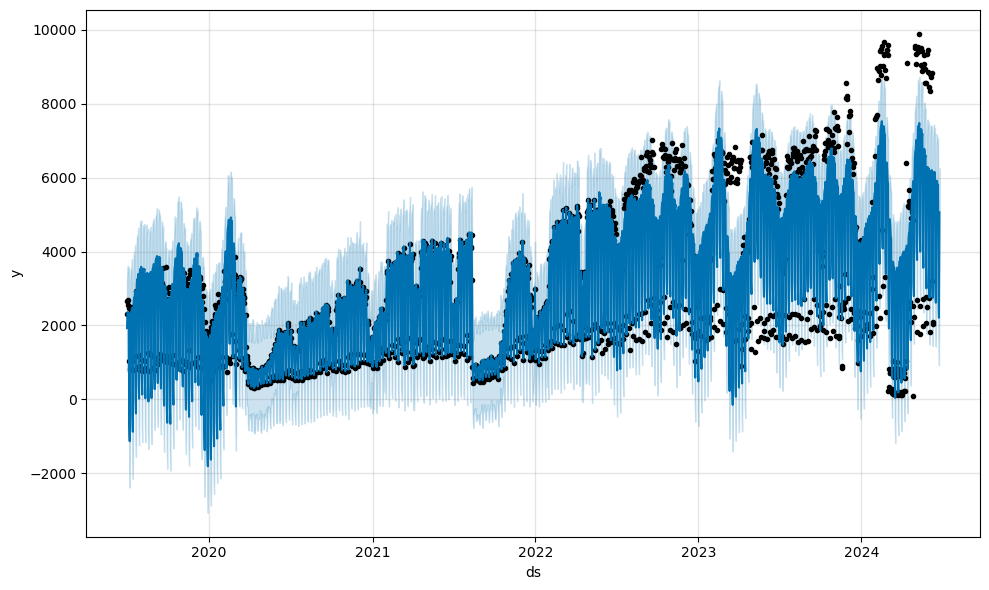

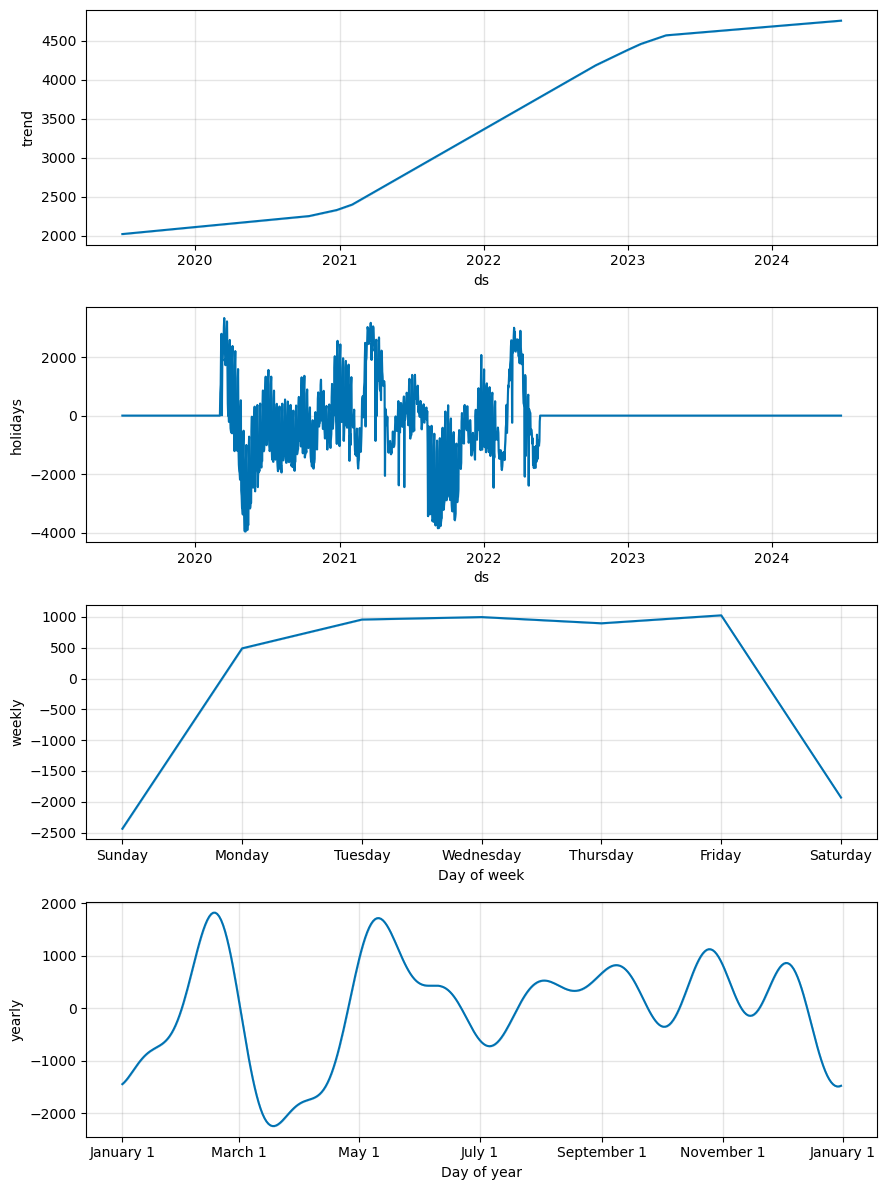

In [198]:
model = Prophet(holidays= events)

# model.add_country_holidays(country_name='IN')

model.changepoints = pd.to_datetime(manual_change_points)

model.fit(df_train)

predict_df = model.make_future_dataframe(periods=14)

prediction = model.predict(predict_df)

model.plot(prediction)

model.plot_components(prediction)

comparison_df = pd.merge(df_test,prediction[['ds', 'yhat_lower','yhat_upper','yhat']], on='ds' )


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mae)

mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])

print('MAPE : ', mape)


In [199]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, date_column=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index if not date_column else df[date_column]
    # Extract datetime features
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Hour'] = df['Date'].dt.hour
    df['Minute'] = df['Date'].dt.minute
    df['Second'] = df['Date'].dt.second
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter
    df['IsMonthStart'] = df['Date'].dt.is_month_start
    df['IsMonthEnd'] = df['Date'].dt.is_month_end
    df['IsQuarterStart'] = df['Date'].dt.is_quarter_start
    df['IsQuarterEnd'] = df['Date'].dt.is_quarter_end
    df['IsYearStart'] = df['Date'].dt.is_year_start
    df['IsYearEnd'] = df['Date'].dt.is_year_end
    
#     X = df[['Date', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'DayOfWeek', 
#             'DayOfYear', 'WeekOfYear', 'Quarter', 'IsMonthStart', 'IsMonthEnd', 
#             'IsQuarterStart', 'IsQuarterEnd', 'IsYearStart', 'IsYearEnd']]
    
    single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
    df.drop(columns=single_value_columns, axis=1, inplace = True)
            
    return df

10:49:28 - cmdstanpy - INFO - Chain [1] start processing
10:49:32 - cmdstanpy - INFO - Chain [1] done processing


MAE :  429.43088807492444
MAPE :  0.2771837447021212


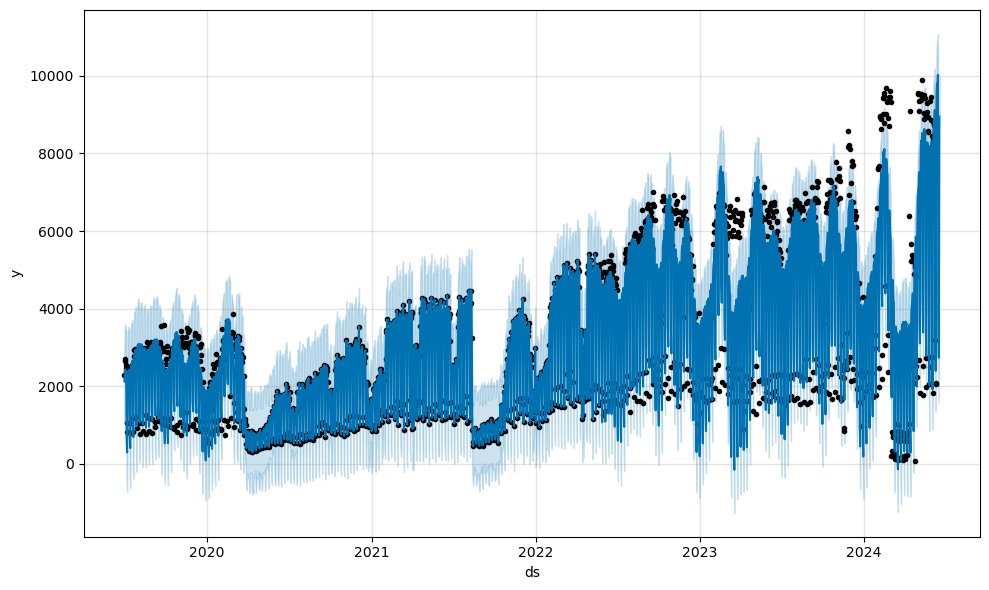

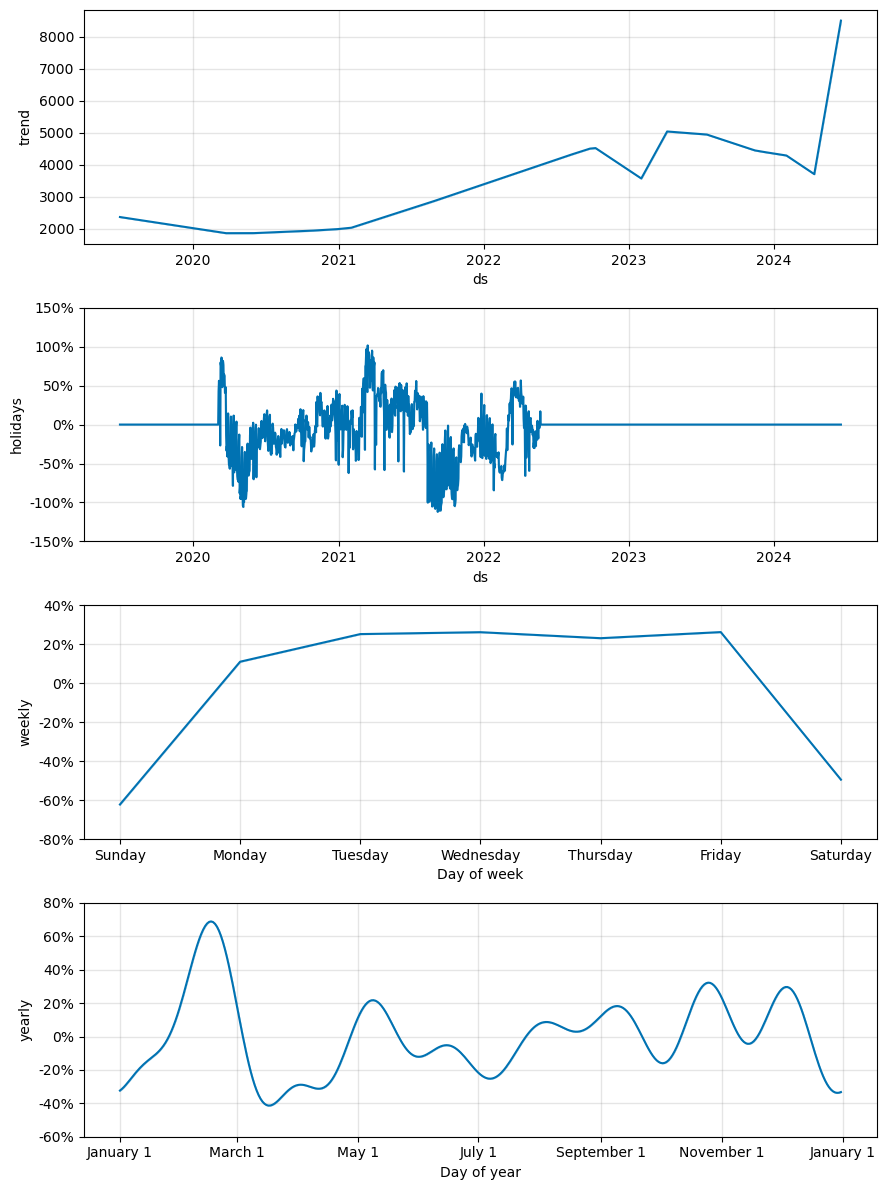

In [200]:
model = Prophet(holidays= events, seasonality_mode='multiplicative', 
                changepoint_prior_scale=0.60, holidays_prior_scale= 25)

# model.add_country_holidays(country_name='IN')

model.changepoints = pd.to_datetime(manual_change_points)

# model.add_regressor('Adult', standardize=True)

# model.add_regressor('Concession', standardize=False)
# model.add_regressor('Tertiary', standardize=False)
# model.add_regressor('School student', standardize=False),

model.fit(df_train)

predict_df = model.make_future_dataframe(periods=7)

prediction = model.predict(passenger_count_df[['y','ds']])

model.plot(prediction)

model.plot_components(prediction)

comparison_df = pd.merge(passenger_count_df,prediction[['ds', 'yhat_lower','yhat_upper','yhat']], on='ds' )


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mae)

mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])

print('MAPE : ', mape)

In [201]:
model = Prophet(holidays= events, seasonality_mode='multiplicative', 
                changepoint_prior_scale=0.60, holidays_prior_scale= 25)

model.changepoints = pd.to_datetime(manual_change_points)

model.fit(passenger_count_df)

predict_df = model.make_future_dataframe(periods=7)

prediction = model.predict(predict_df[['ds']])

# Accessing percentiles
prediction['yhat_10'] = prediction['yhat_lower'] + 0.2 * (prediction['yhat_upper'] - prediction['yhat_lower'])  # 10th percentile
prediction['yhat_90'] = prediction['yhat_lower'] + 0.8 * (prediction['yhat_upper'] - prediction['yhat_lower'])  # 90th percentile


10:49:34 - cmdstanpy - INFO - Chain [1] start processing
10:49:40 - cmdstanpy - INFO - Chain [1] done processing


In [203]:
other_forecast = prediction[['yhat','yhat_10','yhat_90']][-7:]

In [205]:
other_forecast

yhat      yhat_10       yhat_90
1814  9800.014992  9085.921298  10346.387966
1815  9908.308681  9241.312358  10550.456041
1816  9663.093874  9074.670459  10346.972455
1817  9924.775169  9314.408469  10559.754389
1818  3251.901400  2640.801139   3907.059038
1819  2068.470014  1456.451903   2726.930144
1820  8557.275847  7860.123887   9168.648484

## looks like prophet improved the accuracy of the forecast, lets find the forecast for the other series too, with one or two series having relationship among themselves as quoted earlier, so lets find the forecasts 

# Adult

In [208]:
passenger.head()

Date  Other  Adult  Concession  Tertiary  School student
0  01-07-2019   2302  31702       12117      9238           15181
1  02-07-2019   2660  33561       12829      9416           15479
2  03-07-2019   2695  33032       13151      9241           15378
3  04-07-2019   2545  33139       13068      9375           14882
4  05-07-2019   2460  31142       12909      9199           13297

In [209]:
passenger_count_df = passenger.copy()

In [210]:
passenger_count_df['ds'] = pd.to_datetime(passenger_count_df['Date'], format="%d-%m-%Y")

passenger_count_df.rename({'Adult':'y'}, axis=1, inplace = True)

passenger_count_df.drop('Date', axis=1, inplace=True)

passenger_count_df.head()

Other      y  Concession  Tertiary  School student         ds
0   2302  31702       12117      9238           15181 2019-07-01
1   2660  33561       12829      9416           15479 2019-07-02
2   2695  33032       13151      9241           15378 2019-07-03
3   2545  33139       13068      9375           14882 2019-07-04
4   2460  31142       12909      9199           13297 2019-07-05

10:56:21 - cmdstanpy - INFO - Chain [1] start processing
10:56:22 - cmdstanpy - INFO - Chain [1] done processing


MAE :  15196.81777321731
MAPE :  0.8472940175294595


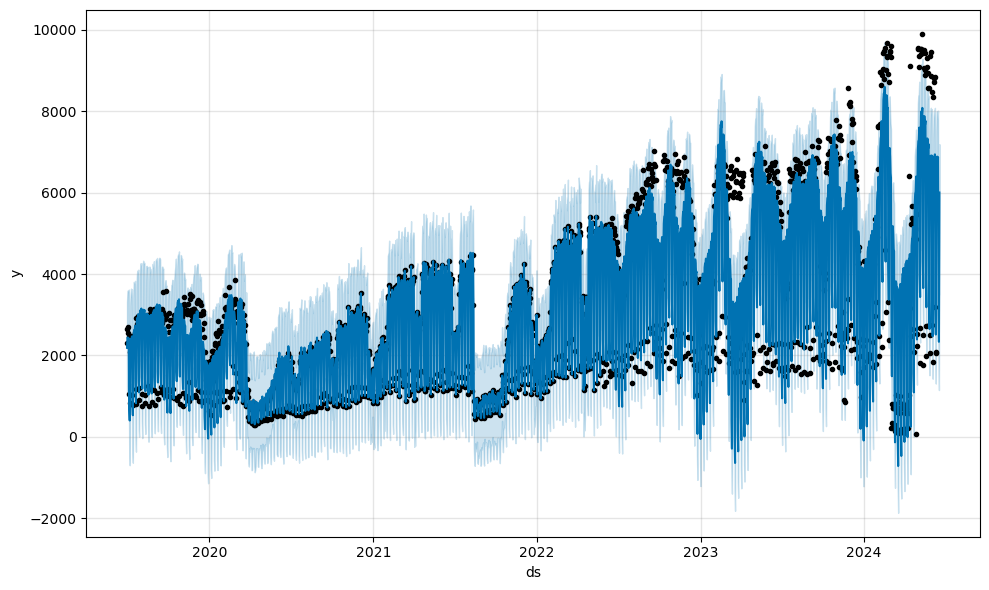

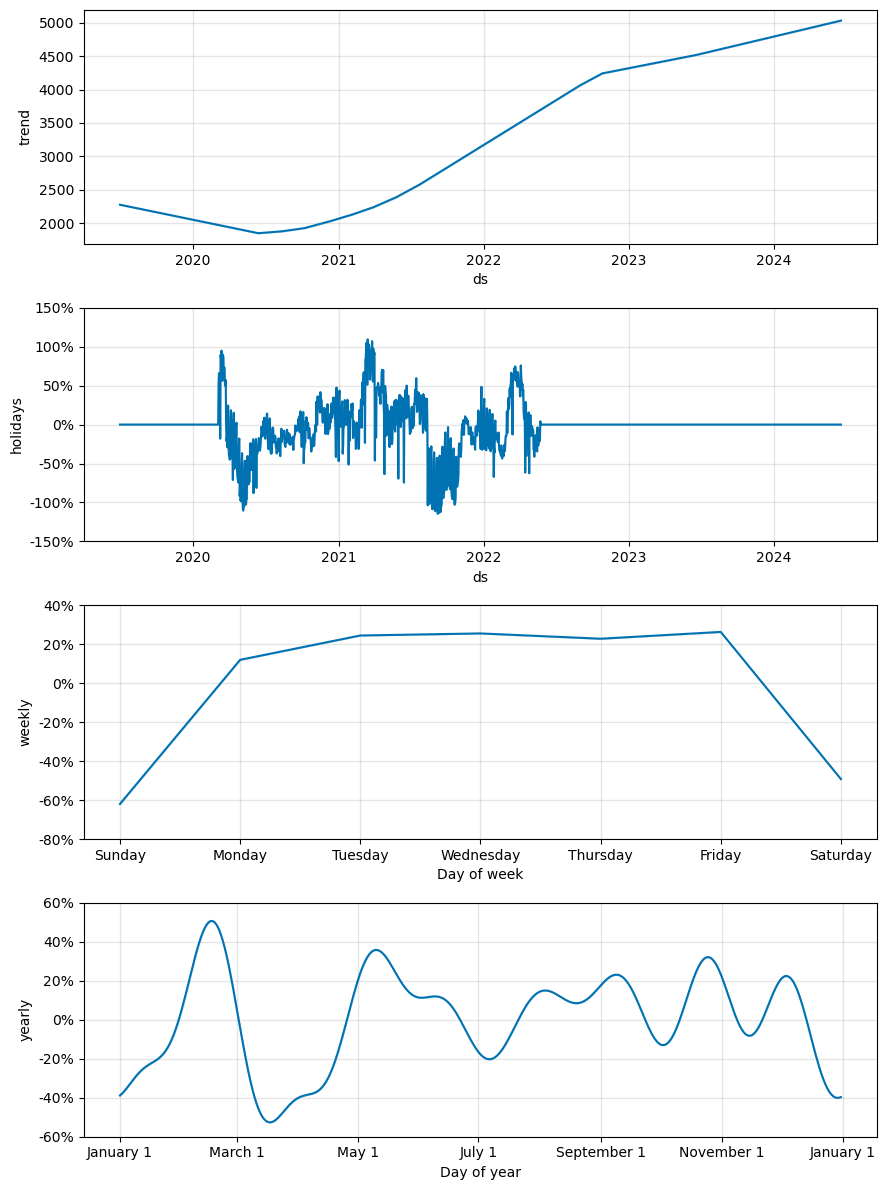

In [216]:
model = Prophet(holidays= events, seasonality_mode='multiplicative', 
                changepoint_prior_scale=0.10, holidays_prior_scale= 10, seasonality_prior_scale=30)

# model.add_country_holidays(country_name='IN')

# model.changepoints = pd.to_datetime(manual_change_points)

# model.add_regressor('Other', standardize=True)
# model.add_regressor('Concession', standardize=False)
# model.add_regressor('Tertiary', standardize=False)
# model.add_regressor('School student', standardize=False),

model.fit(df_train)

predict_df = model.make_future_dataframe(periods=7)

prediction = model.predict(passenger_count_df[['y','ds']])

model.plot(prediction)

model.plot_components(prediction)

comparison_df = pd.merge(passenger_count_df,prediction[['ds', 'yhat_lower','yhat_upper','yhat']], on='ds' )


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mae)

mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])

print('MAPE : ', mape)

In [217]:
model = Prophet(holidays= events, seasonality_mode='multiplicative', 
                changepoint_prior_scale=0.10, holidays_prior_scale= 10, seasonality_prior_scale=30)


model.fit(passenger_count_df)

predict_df = model.make_future_dataframe(periods=7)

prediction = model.predict(predict_df[['ds']])

# Accessing percentiles
prediction['yhat_10'] = prediction['yhat_lower'] + 0.2 * (prediction['yhat_upper'] - prediction['yhat_lower'])  # 10th percentile
prediction['yhat_90'] = prediction['yhat_lower'] + 0.8 * (prediction['yhat_upper'] - prediction['yhat_lower'])  # 90th percentile


10:56:53 - cmdstanpy - INFO - Chain [1] start processing
10:56:56 - cmdstanpy - INFO - Chain [1] done processing


In [219]:
Adult_forecast = prediction[['yhat','yhat_10','yhat_90']][-7:]
Adult_forecast

yhat       yhat_10       yhat_90
1814  27921.793693  25486.600497  30011.698140
1815  27810.661104  25671.295061  30005.106135
1816  27029.483239  24982.849126  29335.918091
1817  25357.603092  23167.832656  27690.833708
1818   8934.644702   6470.018752  11101.896418
1819   5923.806348   3787.655190   8270.333654
1820  23836.866324  21327.528288  25676.262673

## Tertiary

11:01:34 - cmdstanpy - INFO - Chain [1] start processing
11:01:36 - cmdstanpy - INFO - Chain [1] done processing


MAE :  3385.1001088088055
MAPE :  1.4938565013888016e+16


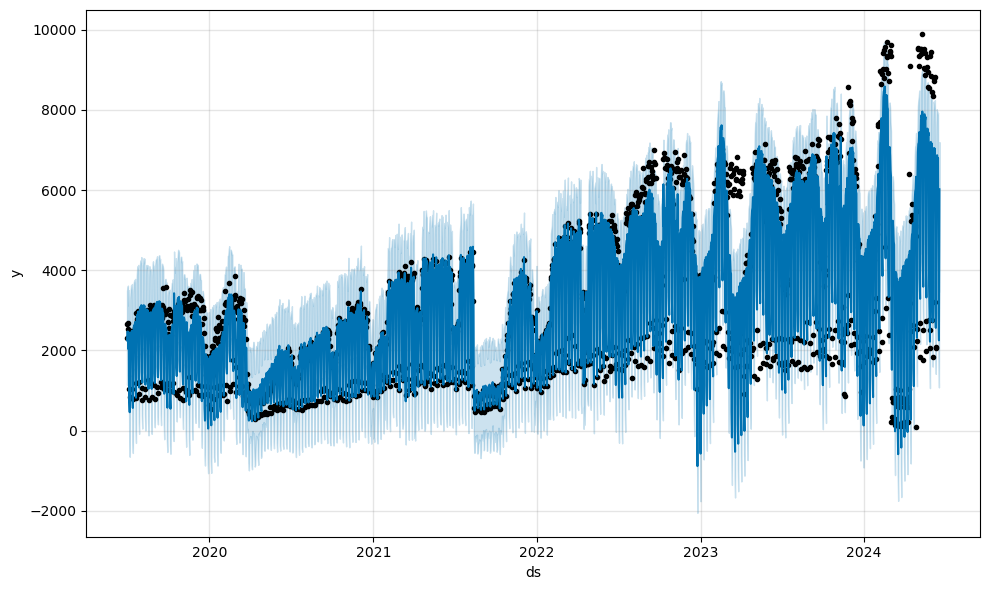

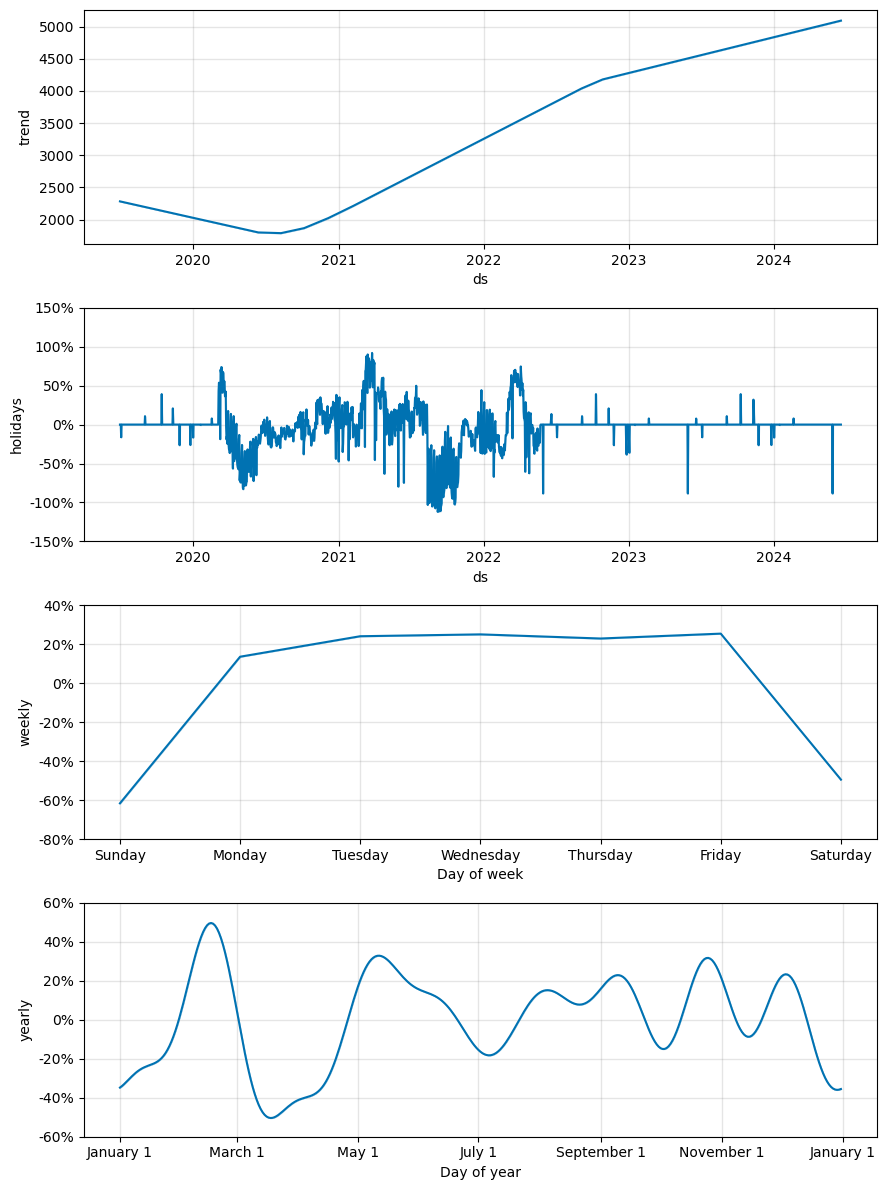

In [226]:

passenger_count_df = passenger.copy()

passenger_count_df['ds'] = pd.to_datetime(passenger_count_df['Date'], format="%d-%m-%Y")

passenger_count_df.rename({'Tertiary':'y'}, axis=1, inplace = True)

passenger_count_df.drop('Date', axis=1, inplace=True)

passenger_count_df.head()

model = Prophet(holidays= events, seasonality_mode='multiplicative', 
                changepoint_prior_scale=0.04, holidays_prior_scale= 20, seasonality_prior_scale=30)

model.add_country_holidays(country_name='US')

# model.changepoints = pd.to_datetime(manual_change_points)

# model.add_regressor('Other', standardize=True)
# model.add_regressor('Concession', standardize=False)
# model.add_regressor('Adult', standardize=False)
# model.add_regressor('School student', standardize=False),

model.fit(df_train)

predict_df = model.make_future_dataframe(periods=7)

prediction = model.predict(passenger_count_df[['y','ds']])

model.plot(prediction)

model.plot_components(prediction)

comparison_df = pd.merge(passenger_count_df,prediction[['ds', 'yhat_lower','yhat_upper','yhat']], on='ds' )


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mae)

mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])

print('MAPE : ', mape)

model = Prophet(holidays= events, seasonality_mode='multiplicative', 
                changepoint_prior_scale=0.10, holidays_prior_scale= 10, seasonality_prior_scale=30)

In [227]:
model.fit(passenger_count_df)

predict_df = model.make_future_dataframe(periods=7)

prediction = model.predict(predict_df[['ds']])

# Accessing percentiles
prediction['yhat_10'] = prediction['yhat_lower'] + 0.2 * (prediction['yhat_upper'] - prediction['yhat_lower'])  # 10th percentile
prediction['yhat_90'] = prediction['yhat_lower'] + 0.8 * (prediction['yhat_upper'] - prediction['yhat_lower'])  # 90th percentile


Tertiary_forecast = prediction[['yhat','yhat_10','yhat_90']][-7:]
Tertiary_forecast

11:01:49 - cmdstanpy - INFO - Chain [1] start processing
11:01:51 - cmdstanpy - INFO - Chain [1] done processing


yhat      yhat_10       yhat_90
1814  9769.810144  9097.432583  10464.780005
1815  9821.411014  9063.396959  10492.501299
1816  9647.388244  8961.956876  10375.159801
1817  9416.820662  8694.150987  10021.451477
1818  4623.427868  3960.452380   5369.004511
1819  3082.635588  2383.655218   3806.717967
1820  7920.105492  7226.575331   8591.511843

## Concession

11:04:08 - cmdstanpy - INFO - Chain [1] start processing
11:04:11 - cmdstanpy - INFO - Chain [1] done processing


MAE :  4232.738737768102
MAPE :  0.5988921020165554


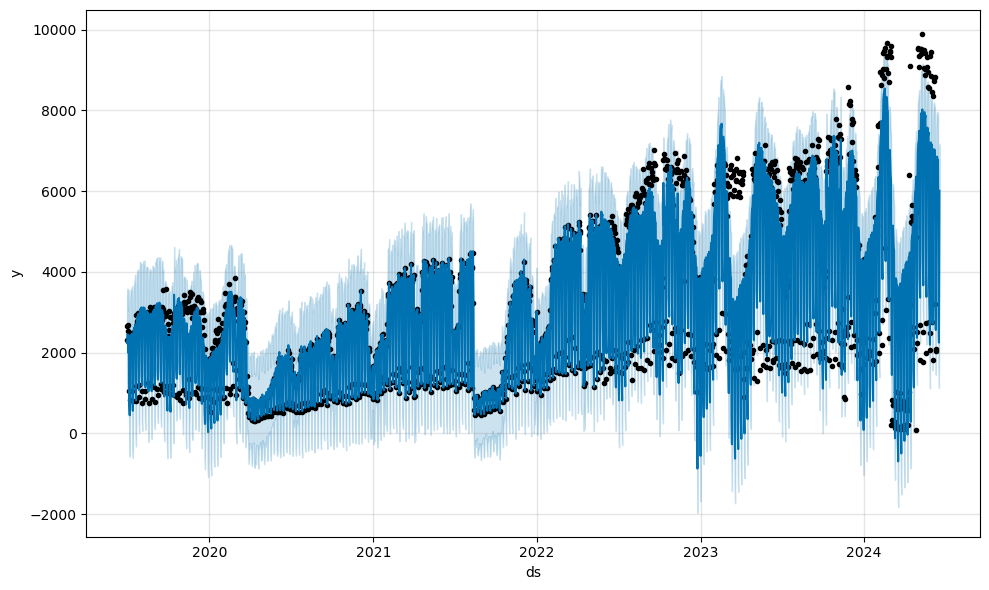

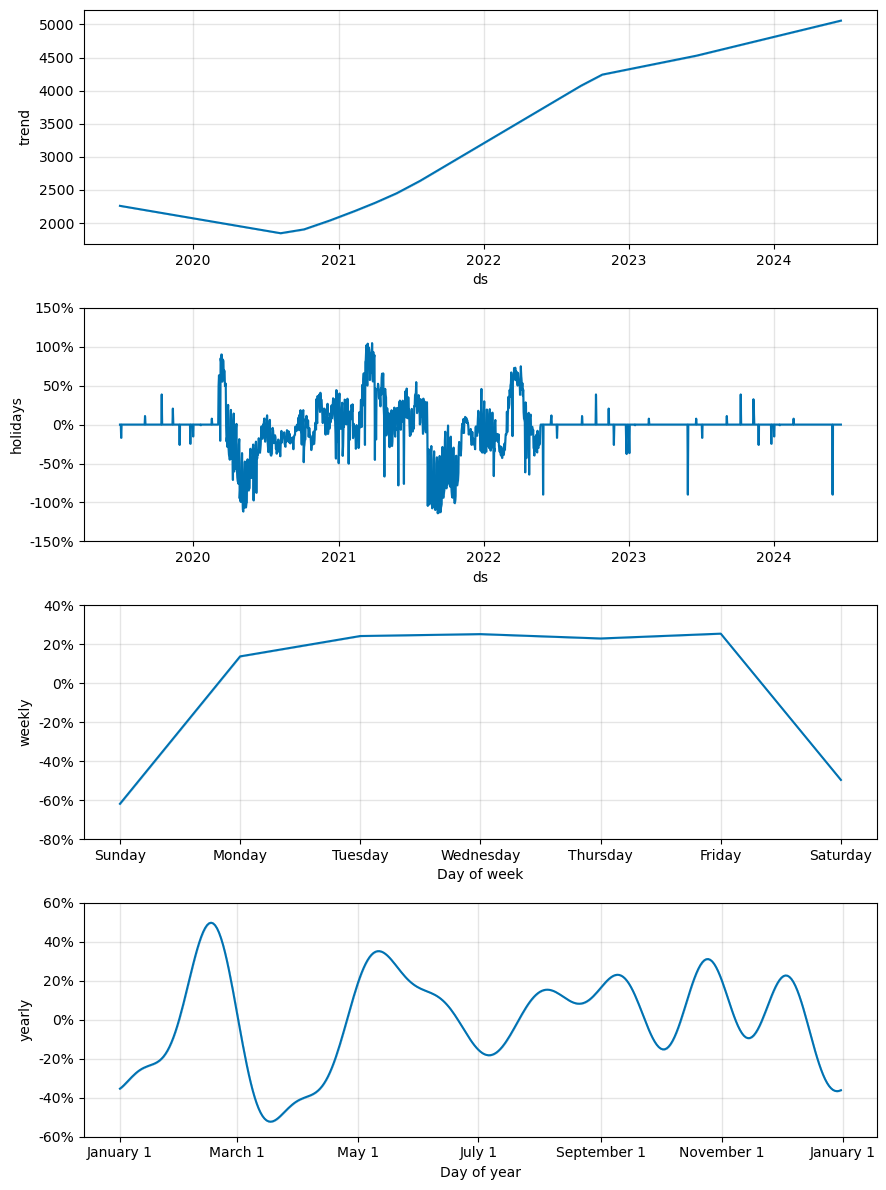

In [233]:
passenger_count_df = passenger.copy()

passenger_count_df['ds'] = pd.to_datetime(passenger_count_df['Date'], format="%d-%m-%Y")

passenger_count_df.rename({'Concession':'y'}, axis=1, inplace = True)

passenger_count_df.drop('Date', axis=1, inplace=True)

passenger_count_df.head()

model = Prophet(holidays= events, seasonality_mode='multiplicative', 
                changepoint_prior_scale=0.10, holidays_prior_scale= 10, seasonality_prior_scale=5)

model.add_country_holidays(country_name='US')

# model.changepoints = pd.to_datetime(manual_change_points)

# model.add_regressor('Other', standardize=True)
# model.add_regressor('Tertiary', standardize=False)
# model.add_regressor('Adult', standardize=False)
# model.add_regressor('School student', standardize=False),

model.fit(df_train)

predict_df = model.make_future_dataframe(periods=7)

prediction = model.predict(passenger_count_df[['y','ds','Adult']])

model.plot(prediction)

model.plot_components(prediction)

comparison_df = pd.merge(passenger_count_df,prediction[['ds', 'yhat_lower','yhat_upper','yhat']], on='ds' )


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mae)

mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])

print('MAPE : ', mape)

In [235]:
model = Prophet(holidays= events, seasonality_mode='multiplicative', 
                changepoint_prior_scale=0.10, holidays_prior_scale= 10, seasonality_prior_scale=5)

model.fit(passenger_count_df)

predict_df = model.make_future_dataframe(periods=7)

prediction = model.predict(predict_df[['ds']])

# Accessing percentiles
prediction['yhat_10'] = prediction['yhat_lower'] + 0.2 * (prediction['yhat_upper'] - prediction['yhat_lower'])  # 10th percentile
prediction['yhat_90'] = prediction['yhat_lower'] + 0.8 * (prediction['yhat_upper'] - prediction['yhat_lower'])  # 90th percentile


Concession_forecast = prediction[['yhat','yhat_10','yhat_90']][-7:]
Concession_forecast

11:07:20 - cmdstanpy - INFO - Chain [1] start processing
11:07:23 - cmdstanpy - INFO - Chain [1] done processing


yhat      yhat_10       yhat_90
1814  9475.965278  8766.230148  10185.824421
1815  9409.639620  8661.152629  10119.582862
1816  9456.814561  8719.678763  10115.523742
1817  9519.791781  8877.369198  10272.485430
1818  4011.014741  3293.043156   4784.648727
1819  2764.712045  2033.927561   3456.467263
1820  8140.926936  7373.526683   8884.062711

# School student

11:08:26 - cmdstanpy - INFO - Chain [1] start processing
11:08:28 - cmdstanpy - INFO - Chain [1] done processing


MAE :  6524.200905138898
MAPE :  1.4916285352139462e+16


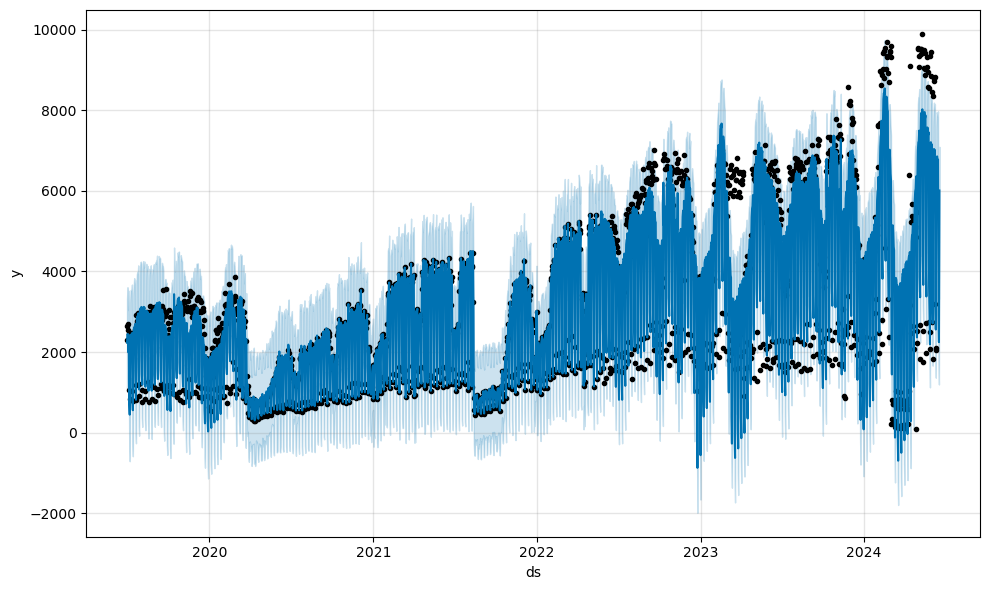

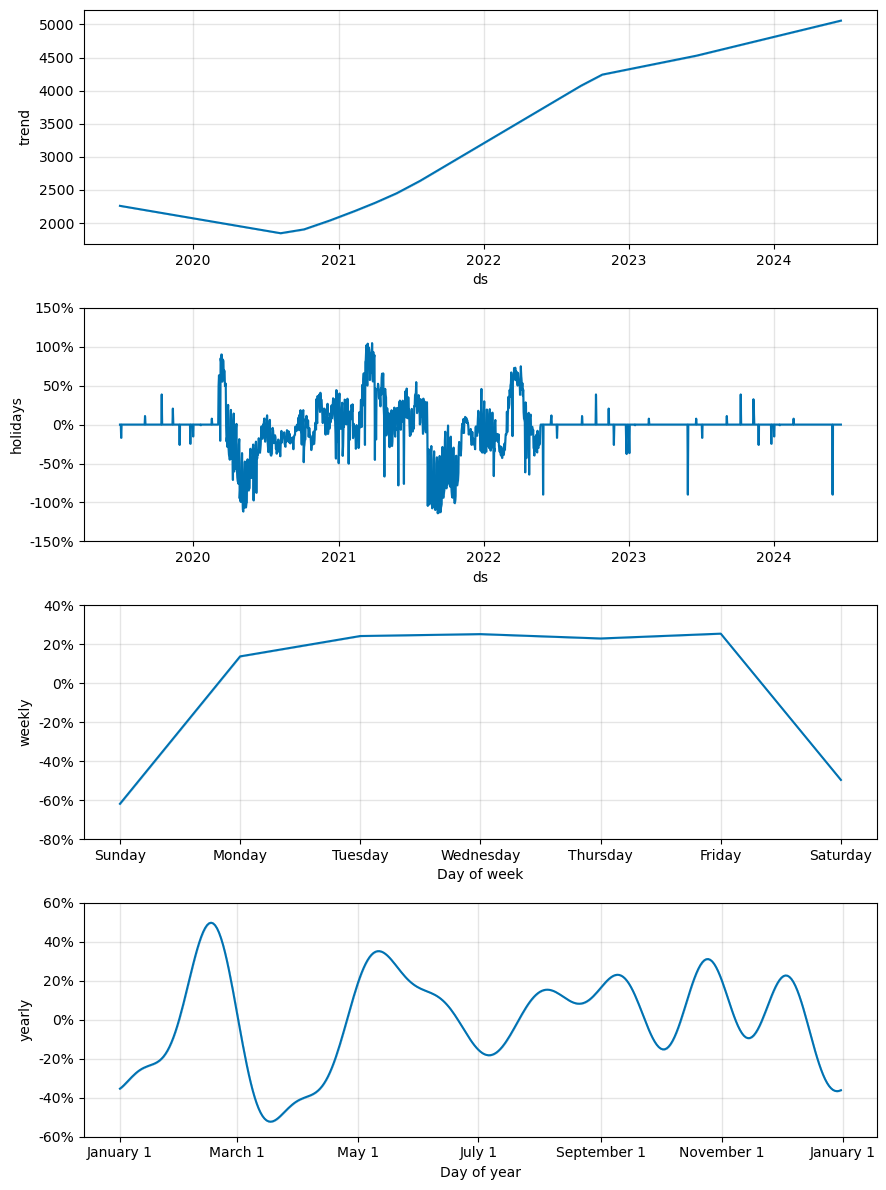

In [239]:
passenger_count_df = passenger.copy()

passenger_count_df['ds'] = pd.to_datetime(passenger_count_df['Date'], format="%d-%m-%Y")

passenger_count_df.rename({'School student':'y'}, axis=1, inplace = True)

passenger_count_df.drop('Date', axis=1, inplace=True)


model = Prophet(holidays= events, seasonality_mode='multiplicative', 
                changepoint_prior_scale=0.10, holidays_prior_scale= 10, seasonality_prior_scale=5)

# model.add_country_holidays(country_name='US')

# model.changepoints = pd.to_datetime(manual_change_points)

# model.add_regressor('Other', standardize=True)
# model.add_regressor('Tertiary', standardize=False)
# model.add_regressor('Adult', standardize=False)
# model.add_regressor('Concession', standardize=False),

model.fit(df_train)

predict_df = model.make_future_dataframe(periods=7)

prediction = model.predict(passenger_count_df[['y','ds','Adult']])

model.plot(prediction)

model.plot_components(prediction)

comparison_df = pd.merge(passenger_count_df,prediction[['ds', 'yhat_lower','yhat_upper','yhat']], on='ds' )


from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print('MAE : ', mae)

mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat'])

print('MAPE : ', mape)


In [240]:
model = Prophet(holidays= events, seasonality_mode='multiplicative', 
                changepoint_prior_scale=0.10, holidays_prior_scale= 10, seasonality_prior_scale=5)

model.fit(passenger_count_df)

predict_df = model.make_future_dataframe(periods=7)

prediction = model.predict(predict_df[['ds']])

# Accessing percentiles
prediction['yhat_10'] = prediction['yhat_lower'] + 0.2 * (prediction['yhat_upper'] - prediction['yhat_lower'])  # 10th percentile
prediction['yhat_90'] = prediction['yhat_lower'] + 0.8 * (prediction['yhat_upper'] - prediction['yhat_lower'])  # 90th percentile


school_forecast = prediction[['yhat','yhat_10','yhat_90']][-7:]
school_forecast

11:09:22 - cmdstanpy - INFO - Chain [1] start processing
11:09:24 - cmdstanpy - INFO - Chain [1] done processing


yhat       yhat_10       yhat_90
1814  14841.532732  12738.945447  16947.118200
1815  14826.569887  13024.671102  16971.758053
1816  14158.461730  12166.623652  16017.487332
1817  13195.271480  11076.126031  14981.896020
1818   2040.311904    -46.791649   4022.347206
1819    944.263968  -1052.101020   2861.221723
1820  11098.617823   8885.815810  12819.099076

## with  features being forecastable as well as show noise data during later parts of the actual timeline, can be improved in all areas with much more feature engineering and adding new regressors ( which i have not added ). 

In [250]:
# Other 
print(' Other forecast \n')
print(other_forecast)
# Adult
print('\n Adult forecast \n')
print(Adult_forecast)
# Concession
print('\n Concession forecast \n')
print(Concession_forecast)
# Tertiary
print('\n Tertiary forecast \n')
print(Tertiary_forecast)
# School students
print('\n School students forecast \n')
print(school_forecast)


 Other forecast 

             yhat      yhat_10       yhat_90
1814  9800.014992  9085.921298  10346.387966
1815  9908.308681  9241.312358  10550.456041
1816  9663.093874  9074.670459  10346.972455
1817  9924.775169  9314.408469  10559.754389
1818  3251.901400  2640.801139   3907.059038
1819  2068.470014  1456.451903   2726.930144
1820  8557.275847  7860.123887   9168.648484

 Adult forecast 

              yhat       yhat_10       yhat_90
1814  27921.793693  25486.600497  30011.698140
1815  27810.661104  25671.295061  30005.106135
1816  27029.483239  24982.849126  29335.918091
1817  25357.603092  23167.832656  27690.833708
1818   8934.644702   6470.018752  11101.896418
1819   5923.806348   3787.655190   8270.333654
1820  23836.866324  21327.528288  25676.262673

 Concession forecast 

             yhat      yhat_10       yhat_90
1814  9475.965278  8766.230148  10185.824421
1815  9409.639620  8661.152629  10119.582862
1816  9456.814561  8719.678763  10115.523742
1817  9519.791781  8877